In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\dataset\titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data = data.drop(['PassengerId','Name','Cabin','Embarked','Parch','Ticket'], axis='columns')


In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [9]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

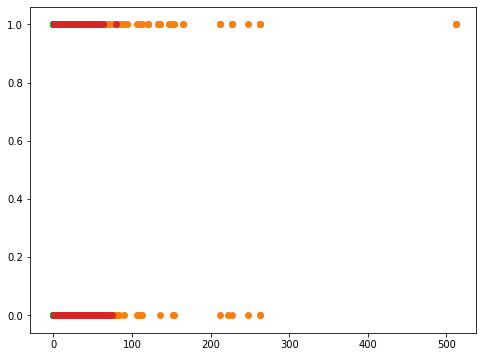

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(data['Pclass'], data['Survived'])
plt.scatter(data['Fare'], data['Survived'])
plt.scatter(data['SibSp'], data['Survived'])
plt.scatter(data['Age'], data['Survived'])

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le_sex = LabelEncoder()

In [14]:
data['Sex_n'] = le_sex.fit_transform(data['Sex'])

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Sex_n
0,0,3,male,22.0,1,7.2500,1
1,1,1,female,38.0,1,71.2833,0
2,1,3,female,26.0,0,7.9250,0
3,1,1,female,35.0,1,53.1000,0
4,0,3,male,35.0,0,8.0500,1


In [16]:
final = data.drop(['Sex'], axis='columns')

In [17]:
final.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_n
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,0,3,35.0,0,8.0500,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X  = final.drop(['Survived'], axis='columns')
y = final['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

In [21]:
X_train.shape

(757, 5)

In [22]:
X_test.shape

(134, 5)

In [23]:
from sklearn import tree

In [24]:
model = tree.DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
model.score(X_test,y_test)

0.835820895522388

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_predicted,y_test)
cm

array([[68,  7],
       [15, 44]], dtype=int64)

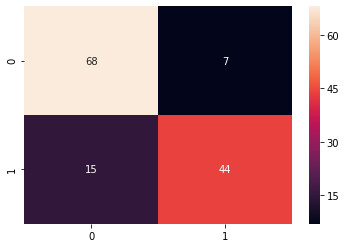

In [29]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [30]:
X_test.tail(10)

,Pclass,Age,SibSp,Fare,Sex_n
609,1,40.0,0,153.4625,0
596,2,28.0,0,33.0000,0
801,2,31.0,1,26.2500,0
340,2,2.0,1,26.0000,1
71,3,16.0,5,46.9000,0
351,1,28.0,0,35.0000,1
881,3,33.0,0,7.8958,1
675,3,18.0,0,7.7750,1
533,3,28.0,0,22.3583,0
32,3,28.0,0,7.7500,0


In [31]:
model.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)